# Metodos basicos de Eliminacion e Imputacion de Valores Faltantes

## Librerias

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno

## Cargar Datos

Conjunto de datos referentes a encuestas de salud sobre la población de EE.UU. Archivo de tipo csv ubicado en la carpeta data. Contiene 34 variables y 245 observaciones

In [3]:
datos = pd.read_csv('./data/riskfactors.csv')

data_df = pd.DataFrame(datos)

data_df

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100,smoke_days,smoke_stop,smoke_last,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice
0,26,Female,49,190.0,64.0,32.68,Married,NaN,0,6.0,...,No,NaN,NaN,NaN,1095.0,261.0,104.0,156.0,521.0,12.0
1,40,Female,48,170.0,68.0,25.90,Divorced,NaN,0,5.0,...,No,NaN,NaN,NaN,52.0,209.0,52.0,0.0,52.0,0.0
2,72,Female,55,163.0,64.0,28.04,Married,NaN,0,4.0,...,No,NaN,NaN,NaN,36.0,156.0,52.0,24.0,24.0,24.0
3,42,Male,42,230.0,74.0,29.59,Married,NaN,1,6.0,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,32,Female,66,135.0,62.0,24.74,Widowed,NaN,0,5.0,...,Yes,Everyday,Yes,NaN,-7.0,261.0,209.0,261.0,365.0,104.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,10,Female,79,144.0,63.0,25.56,Widowed,NaN,0,4.0,...,No,NaN,NaN,NaN,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0
241,46,Male,45,170.0,74.0,21.87,Divorced,NaN,2,4.0,...,No,NaN,NaN,NaN,52.0,52.0,52.0,24.0,52.0,24.0
242,15,Male,62,175.0,71.0,24.46,Divorced,NaN,0,6.0,...,Yes,Not@All,NaN,7.0,365.0,156.0,104.0,52.0,730.0,365.0
243,34,Female,62,138.0,64.0,23.74,Married,NaN,0,4.0,...,Yes,Everyday,No,NaN,730.0,0.0,24.0,156.0,104.0,0.0


## Configuracion de Graficos

In [4]:
%matplotlib inline

# tamaño de los graficos
sns.set(
    rc={
        'figure.figsize':(8, 8)
    }
)

# estilo de los graficos
sns.set_style('whitegrid')

## Importar metodos de otro Notebook

In [5]:
%run utils.ipynb

# Metodos de Eliminacion

## Eliminacion por pares (Pairwise Deletion)

Consiste en eliminar los valores faltantes de una variable. Pandas por defecto omite los valores faltantes de las variables a la hora de realizar un calculo. Veamos el siguiente ejemplo 

In [6]:
# Cantidad de valores faltantes de la variable weight
data_df.weight_lbs.isna().sum()

10

In [7]:
# Cantidad de observaciones de weight VS cantidad de observaciones completas de weight
data_df.weight_lbs.size, data_df.weight_lbs.count()

(245, 235)

El resultado indica que hay 245 observaciones para la variable weight de las cuales 235 estan completas.

In [8]:
# calcular la media de la variable weight
(
    data_df
    .weight_lbs
    .mean()
)

174.26808510638298

A pesar que la variable weight posee 10 valores faltantes, Pandas realiza el calculo de la media omitiendo los valores faltantes.

## Eliminacion por caso completo (Listwise Deletion)

Consiste en eliminar las observaciones o registros donde aparezcan un valor faltante en una o  varias variables seleccionadas. En lo que sigue, utilizaremos las variables weight y height

### Listwise Deletion en funcion de una variable

In [9]:
# eliminar los registros con valores faltantes en la variable weight
(
    data_df                          # Dataframe
    .dropna(
        subset=['weight_lbs'],  # variable seleccionada
        how='any'               # modo de deteccion
    )
).shape                         # forma del DataFrame

(235, 34)

Observamos que fueron eliminados 10 registros los cuales tenian valores faltantes en la variable weight. Para visualizar la variable despues de eliminar los valores faltantes utilizamos el siguiente codigo:

<AxesSubplot:>

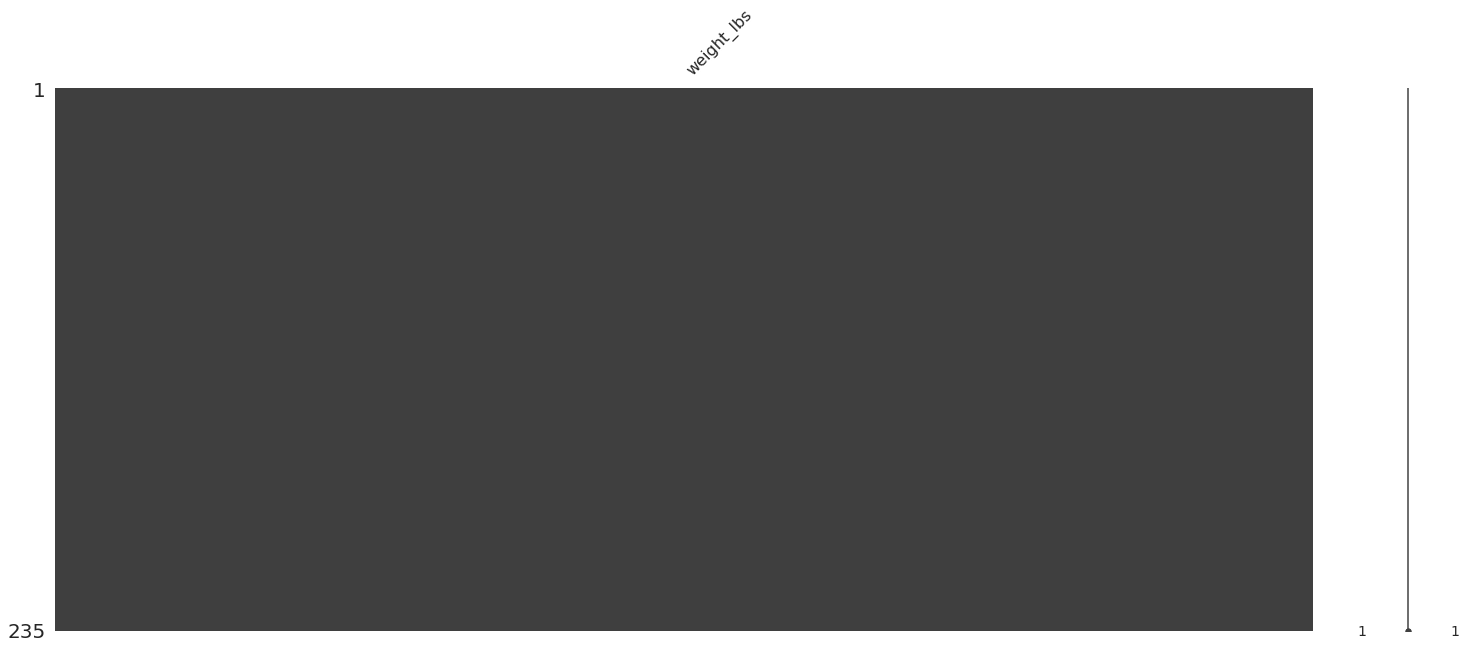

In [10]:
(
    data_df                          # Dataframe
    .dropna(
        subset=['weight_lbs'],  # variable seleccionada
        how='any'               # modo de deteccion
    )
    .loc[:,['weight_lbs']]
    .pipe(missingno.matrix)
)

Notamos que la variable queda limpia de valores faltantes lista para ser trabajada

### Listwise Deletion en funcion de dos variables

Elimina las observaciones donde hayan valores faltantes en cualquiera de las dos variables seleccionadas

In [11]:
# eliminar registros donde hayan valores faltantes en weight y height
(
    data_df                                          # Dataframe
    .dropna(
        subset=['weight_lbs', 'height_inch'],   # variables seleccionadas
        how='any'                               # modo de deteccion
    )
).shape                                         # forma del Dataframe

(234, 34)

Vemos que fueron eliminados 11 registros con valores faltantes en weight y height. Para visualizar ambas variables despues de aplicar el metodo utilizamos el siguiente codigo:

<AxesSubplot:>

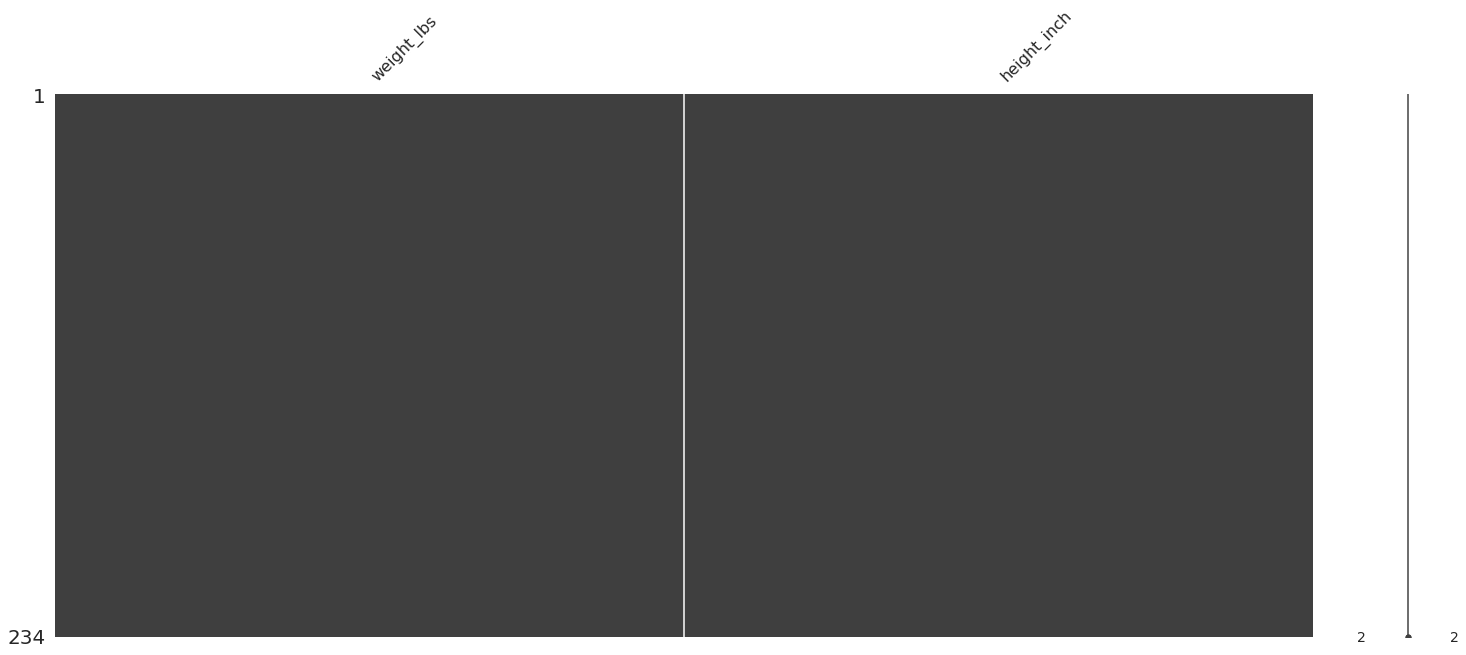

In [12]:
# Visualizacion de las variables despues de eliminar los registros
(
    data_df
    .dropna(
        subset=['weight_lbs', 'height_inch'], # variables seleccionadas
        how='any'                             # modo de deteccion
    )
    .loc[:,['weight_lbs', 'height_inch']]     # variables a graficar
    .pipe(missingno.matrix)                   # grafica de matriz para ambas variables
)

Claramente vemos que ambas variables quedan libres de valores faltantes.

### Listwise Deletion donde ambas variables contienen valores faltantes simultaneamente 

Elimina las observaciones donde ambas variables presentan valores faltantes en simultaneo. Puede ser muy util cuando se establece una dependencia entre los valores faltantes de ambas variables

In [13]:
(
    data_df                                     # Dataframe
    .dropna(
        subset=['weight_lbs', 'height_inch'],   # variables seleccionadas
        how='all'                               # modo de deteccion
    )
).shape                                         # forma del Dataframe

(244, 34)

El resultado muestra que solo hay un registro donde ambas variables posee valores faltantes y es eliminado. Para visualizar lo que sucede procedemos como sigue:

<AxesSubplot:>

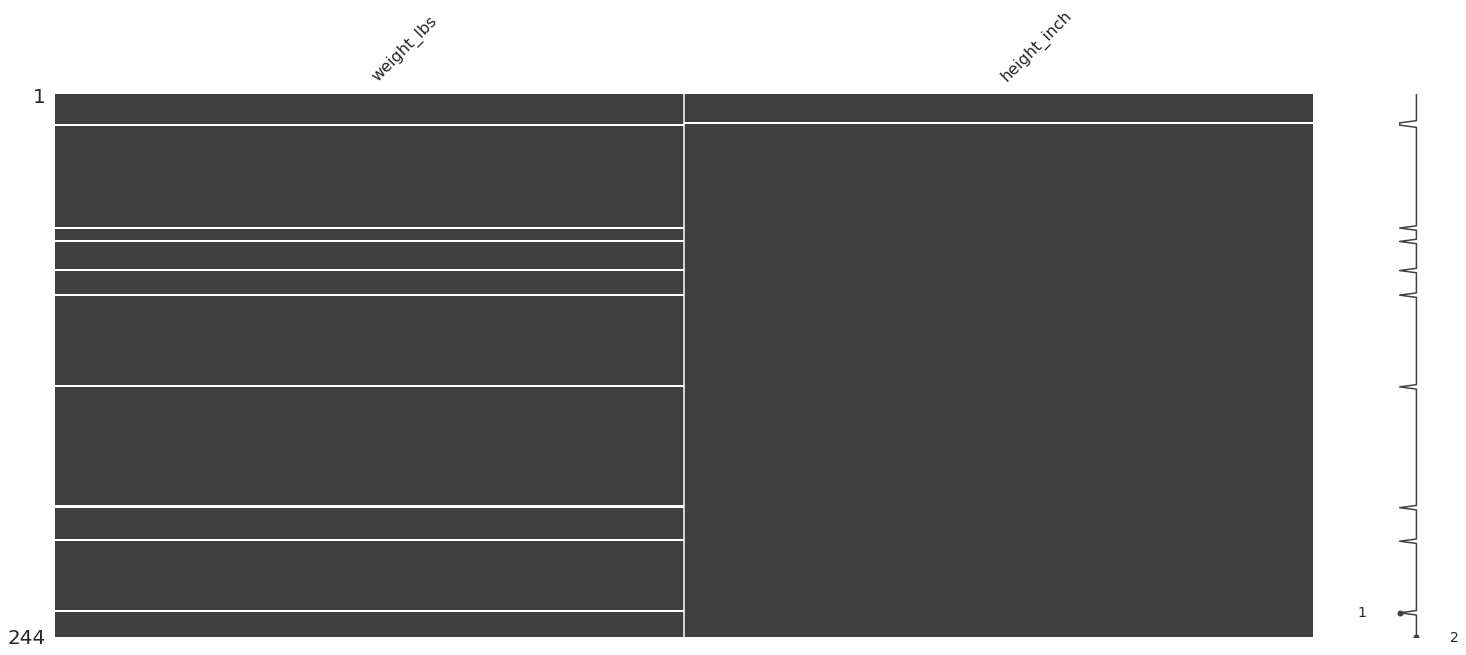

In [14]:
(
    data_df                                          # Dataframe
    .dropna(
        subset=['weight_lbs', 'height_inch'],   # variables seleccionadas
        how='all'                               # modo de deteccion
    )
    .loc[:,['weight_lbs', 'height_inch']]
    .pipe(missingno.matrix)
)

Las lineas blancas de la grafica representan los valores faltantes. Vemos como en este caso, siguen quedando valores faltantes a pesar de aplicar el metodo de eliminacion

# Metodos de Imputacion

La imputacion en general consiste en reemplazar los valores faltantes por algun valor, bien sea estadistico, algun valor por contexto o valores obtenidos mediante un modelo de Machine Learning. La sustitucion mediante valores provenientes de modelos de Machine Learning es un tema avanzado de imputacion que no sera tratado en este Notebook  

## Imputacion con base en el contexto

Consiste en conocer la estructura de los datos para luego completar las entradas vacias. Para explicar mejor el concepto, vamos a crear un DataFrame de prueba y aplicar este metodo.

In [15]:
proof_df = pd.DataFrame(
    data={
        'name': ['lynn', np.nan, 'zelia', np.nan, 'shadow', np.nan],
        'time': ['manana', 'tarde', 'manana', 'tarde', 'manana', 'tarde'],
        'value': ['350', '310', '320', '350', '310', '320']
    }
)

proof_df

,name,time,value
0,lynn,manana,350
1,NaN,tarde,310
2,zelia,manana,320
3,NaN,tarde,350
4,shadow,manana,310
5,NaN,tarde,320


Vemos que el DataFrame posee valores faltantes en la variable name, las demas variables estan completas. Ademas, observamos que la variable time posee solo dos valores: manana y tarde. Una vez analizada la estructura, podemos deducir que los valores faltantes hacen referencia a los nombres que los anteceden. Esto pudo realizarse para agilizar la toma de los datos y evitar reescribir el nombre nuevamente el la siguiente linea.

Para completar los valores faltantes utilizamos el metodo ffill de Pandas como sigue:

In [16]:
proof_df.ffill()

,name,time,value
0,lynn,manana,350
1,lynn,tarde,310
2,zelia,manana,320
3,zelia,tarde,350
4,shadow,manana,310
5,shadow,tarde,320


## Imputacion de un unico valor

Es util cuando el contexto no ayuda a completar los valores faltantes y sobretodo cuando tratamos con valores numericos debido a que se reemplaza por un estadistico. 

En lo que sigue, vamos a imputar los valores faltantes de las variables height y weight. Para ello creamos la matriz de sombra de ambas variables mediante el metodo externo bind_sahdow_matrix perteneciente al Notebook utils

In [17]:
# matriz tabular de las variables weight y height
(
    data_df                                 # DataFrame
    .loc[:,['weight_lbs', 'height_inch']]   # Variables seleccionadas
    .missing.bind_shadow_matrix(true_string=True, false_string=False)   # matriz de sombra
)

,weight_lbs,height_inch,weight_lbs_NA,height_inch_NA
0,190.0,64.0,False,False
1,170.0,68.0,False,False
2,163.0,64.0,False,False
3,230.0,74.0,False,False
4,135.0,62.0,False,False
...,...,...,...,...
240,144.0,63.0,False,False
241,170.0,74.0,False,False
242,175.0,71.0,False,False
243,138.0,64.0,False,False


In [18]:
# imputamos los valores de weight y height sin alterar los valores de la matriz de sombra
(
    data_df                                 # DataFrame
    .loc[:,['weight_lbs', 'height_inch']]   # Variables seleccionadas
    .missing.bind_shadow_matrix(true_string=True, false_string=False)   # matriz de sombra
    .apply(                                 # imputacion de valores faltantes por la media
        axis = 'rows',
        func = lambda column: column.fillna(column.mean() if '_NA' not in column.name else column)
    )
)

,weight_lbs,height_inch,weight_lbs_NA,height_inch_NA
0,190.0,64.0,False,False
1,170.0,68.0,False,False
2,163.0,64.0,False,False
3,230.0,74.0,False,False
4,135.0,62.0,False,False
...,...,...,...,...
240,144.0,63.0,False,False
241,170.0,74.0,False,False
242,175.0,71.0,False,False
243,138.0,64.0,False,False


Una vez imputado los valores faltantes de weight y height por la media, pasamos a visualizar la imputacion para ubicar donde se concentran los valores imputados. Se procede como sigue:

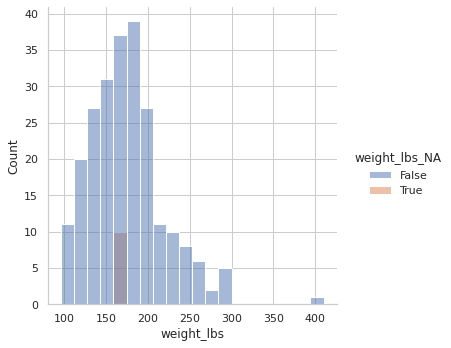

In [19]:
# visualizacion de la imputacion de los valores faltantes para la variable weight
(
    data_df                                 # DataFrame
    .loc[:,['weight_lbs', 'height_inch']]   # Variables seleccionadas
    .missing.bind_shadow_matrix(true_string=True, false_string=False)   # matriz de sombra
    .apply(                                 # imputacion de valores faltantes por la media
        axis = 'rows',
        func = lambda column: column.fillna(column.mean() if '_NA' not in column.name else column)
    )
    .pipe(                                  # Histograma
        lambda df:(
            sns.displot(
                data=df,
                x='weight_lbs',
                hue='weight_lbs_NA'
            )
        )
    )
)

La grafica nos muestra que los valores imputados se concentran en el medio de la distribucion de los datos, es decir, no altera la distribucion por lo que se considera una buena imputacion.

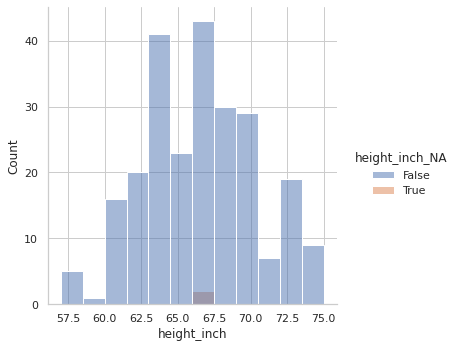

In [20]:
# visualizacion de la imputacion de los valores faltantes para la variable height
(
    data_df                                 # DataFrame
    .loc[:,['weight_lbs', 'height_inch']]   # Variables seleccionadas
    .missing.bind_shadow_matrix(true_string=True, false_string=False)   # matriz de sombra
    .apply(                                 # imputacion de valores faltantes por la media
        axis = 'rows',
        func = lambda column: column.fillna(column.mean() if '_NA' not in column.name else column)
    )
    .pipe(                                  # Histograma
        lambda df:(
            sns.displot(
                data=df,
                x='height_inch',
                hue='height_inch_NA'
            )
        )
    )
)

La grafica nos muestras que los valores imputados de la variable height estan concentrados en el centro de la distribucion lo que indica que ha sido una buena imputacion ya que no sesga los datos.

## Imputacion sobre Multiples Variables

Consiste en imputar los valores faltantes de varias variables en un mismo porcedimiento. Para este caso, trabajamos con tres variables: weight, height y bmi. 

Para obtener un visualizacion relevante de los valores faltantes luego de ser imputados, agregamos una nueva columna de valores booleanos con True para los registros con valores faltantes en dos variables y False en caso contrario.

In [22]:
# Matriz tabular de las variables weight, height y bmi
(
    data_df                                                 # DataFrame
    .loc[:,['weight_lbs', 'height_inch', 'bmi']]            # Variables seleccionadas
    .missing.bind_shadow_matrix(true_string=True, false_string=False) # matriz tabular
    .apply(                                                 # imputacion de los valores por la media
        axis='rows',
        func=lambda column:column.fillna(column.mean() if '_NA' not in column.name else column)
    )
    .assign(                                                # nueva columna: imputed
        imputed=lambda df: df.weight_lbs_NA | df.height_inch_NA
    )
)

,weight_lbs,height_inch,bmi,weight_lbs_NA,height_inch_NA,bmi_NA,imputed
0,190.0,64.0,32.68,False,False,False,False
1,170.0,68.0,25.90,False,False,False,False
2,163.0,64.0,28.04,False,False,False,False
3,230.0,74.0,29.59,False,False,False,False
4,135.0,62.0,24.74,False,False,False,False
...,...,...,...,...,...,...,...
240,144.0,63.0,25.56,False,False,False,False
241,170.0,74.0,21.87,False,False,False,False
242,175.0,71.0,24.46,False,False,False,False
243,138.0,64.0,23.74,False,False,False,False


La tabla nos muestra la Matriz tabular de las tres variables junto a una nueva columna llamada imputed con True para observaciones con valores faltantes en las variables weight y height. Esta columna permitira visualizar los valores faltantes luego de la imputacion.

Para obtener la visualizacion procedemos como sigue:

<AxesSubplot:xlabel='weight_lbs', ylabel='height_inch'>

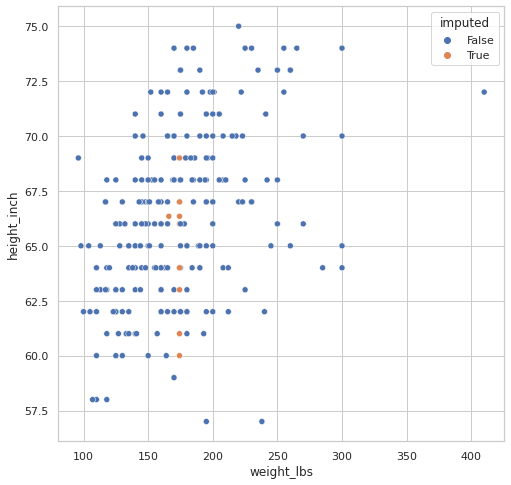

In [23]:
# Matriz tabular de las variables weight, height y bmi
(
    data_df                                                 # DataFrame
    .loc[:,['weight_lbs', 'height_inch', 'bmi']]            # Variables seleccionadas
    .missing.bind_shadow_matrix(true_string=True, false_string=False) # matriz tabular
    .apply(                                                 # imputacion de los valores por la media
        axis='rows',
        func=lambda column:column.fillna(column.mean() if '_NA' not in column.name else column)
    )
    .assign(                                                # nueva columna: imputed
        imputed=lambda df: df.weight_lbs_NA | df.height_inch_NA
    )
    .pipe(
        lambda df:(
            sns.scatterplot(
                data=df,
                x='weight_lbs',
                y='height_inch',
                hue='imputed'
            )
        )
    )
)

La grafica nos muestra puntos azules indicando la presencia de valores en ambas variables mientras que los naranjas indican los valores imputados que como vemos se encuentran dentro del promedio de los valores. Como se ubican en el centro se considera una buena imputacion debido a que sesga los datos. 